In [125]:
# Data Handling & Processing
import pandas as pd
import numpy as np

# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

# Model Evaluation
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Further Ensemble Techniques
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Setting aesthetics for seaborn plots
sns.set_style("whitegrid")

# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


In [126]:
# Loading the dataset
data_full = pd.read_csv('Data_Project_Final.csv')

In [127]:
# Displaying the first few rows of the dataset for verification
data_full.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,05/08/22,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,E0,06/08/22,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,E0,06/08/22,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,E0,06/08/22,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,E0,06/08/22,Newcastle,Nott'm Forest,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0


In [128]:
data_full.shape

(7600, 23)

In [129]:
# Get information about columns, data types, and non-null values
print(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       7600 non-null   object
 1   Date      7600 non-null   object
 2   HomeTeam  7600 non-null   object
 3   AwayTeam  7600 non-null   object
 4   FTHG      7600 non-null   int64 
 5   FTAG      7600 non-null   int64 
 6   FTR       7600 non-null   object
 7   HTHG      7600 non-null   int64 
 8   HTAG      7600 non-null   int64 
 9   HTR       7600 non-null   object
 10  Referee   7600 non-null   object
 11  HS        7600 non-null   int64 
 12  AS        7600 non-null   int64 
 13  HST       7600 non-null   int64 
 14  AST       7600 non-null   int64 
 15  HF        7600 non-null   int64 
 16  AF        7600 non-null   int64 
 17  HC        7600 non-null   int64 
 18  AC        7600 non-null   int64 
 19  HY        7600 non-null   int64 
 20  AY        7600 non-null   int64 
 21  HR        7600

In [130]:
data_full["HomeTeam"].value_counts()

Man United          380
Everton             380
Liverpool           380
Man City            380
Arsenal             380
Chelsea             380
Tottenham           380
Newcastle           342
West Ham            323
Aston Villa         323
Fulham              266
Southampton         247
West Brom           228
Sunderland          209
Crystal Palace      209
Leicester           190
Stoke               190
Blackburn           171
Wolves              171
Bolton              171
Wigan               152
Burnley             152
Middlesbrough       133
Portsmouth          133
Swansea             133
Watford             133
Norwich             133
Brighton            114
Birmingham          114
Bournemouth         114
Hull                 95
Leeds                76
Charlton             76
Sheffield United     57
QPR                  57
Reading              57
Cardiff              38
Huddersfield         38
Brentford            38
Nott'm Forest        19
Blackpool            19
Derby           

In [131]:
data_full["AwayTeam"].value_counts()

Arsenal             380
Man City            380
Liverpool           380
Tottenham           380
Man United          380
Everton             380
Chelsea             380
Newcastle           342
West Ham            323
Aston Villa         323
Fulham              266
Southampton         247
West Brom           228
Sunderland          209
Crystal Palace      209
Leicester           190
Stoke               190
Bolton              171
Blackburn           171
Wolves              171
Wigan               152
Burnley             152
Portsmouth          133
Middlesbrough       133
Swansea             133
Norwich             133
Watford             133
Bournemouth         114
Brighton            114
Birmingham          114
Hull                 95
Leeds                76
Charlton             76
Sheffield United     57
QPR                  57
Reading              57
Huddersfield         38
Cardiff              38
Brentford            38
Blackpool            19
Nott'm Forest        19
Derby           

/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


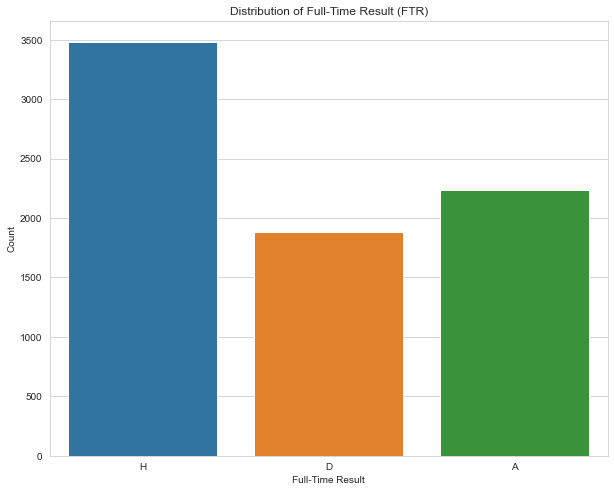

In [132]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting distribution of the target variable 'FTR'
sns.countplot(data_full['FTR'], order=['H', 'D', 'A'])
ax.set_title('Distribution of Full-Time Result (FTR)')
ax.set_xlabel('Full-Time Result')
ax.set_ylabel('Count')

plt.show()

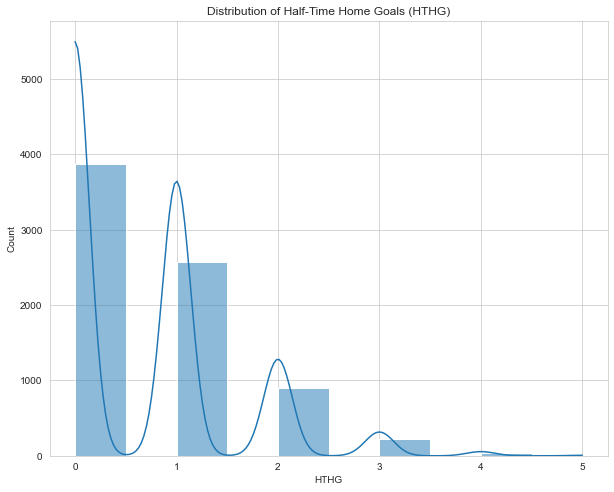

In [133]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting distribution of Half-Time Home Goals (HTHG)
sns.histplot(data_full['HTHG'], kde=True, bins=10)
ax.set_title('Distribution of Half-Time Home Goals (HTHG)')

plt.show()


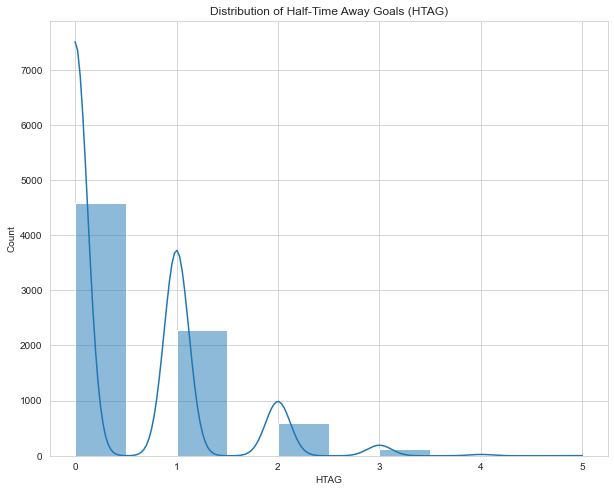

In [134]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting distribution of Half-Time Away Goals (HTAG)
sns.histplot(data_full['HTAG'], kde=True, bins=10)
ax.set_title('Distribution of Half-Time Away Goals (HTAG)')

plt.show()


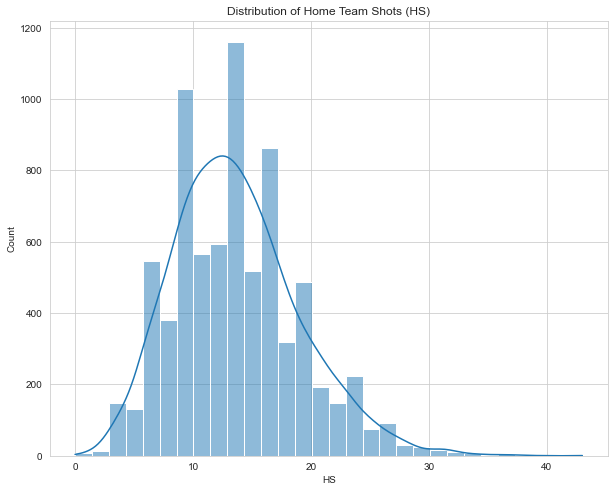

In [135]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting distribution of Home Team Shots (HS)
sns.histplot(data_full['HS'], kde=True, bins=30)
ax.set_title('Distribution of Home Team Shots (HS)')

plt.show()


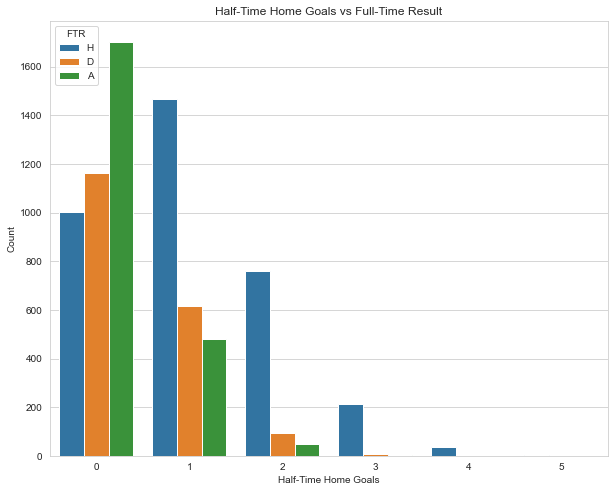

In [136]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the relationship between half-time home goals and full-time result
sns.countplot(data=data_full, x='HTHG', hue='FTR', hue_order=['H', 'D', 'A'])
ax.set_title('Half-Time Home Goals vs Full-Time Result')
ax.set_xlabel('Half-Time Home Goals')
ax.set_ylabel('Count')

plt.show()

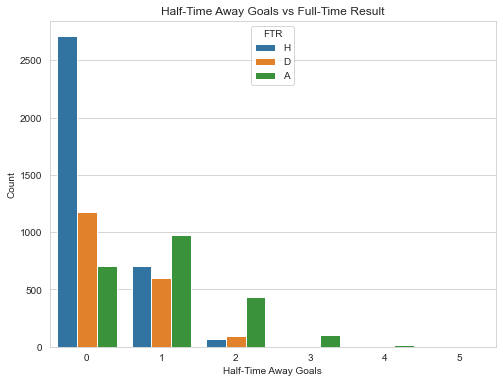

In [137]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the relationship between half-time away goals and full-time result
sns.countplot(data=data_full, x='HTAG', hue='FTR', hue_order=['H', 'D', 'A'])
ax.set_title('Half-Time Away Goals vs Full-Time Result')
ax.set_xlabel('Half-Time Away Goals')
ax.set_ylabel('Count')

plt.show()

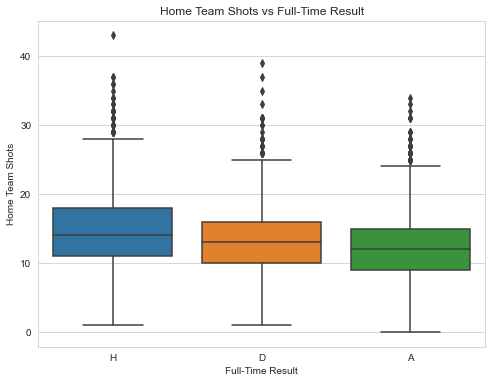

In [138]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Examining relationship between home team shots and full-time result
sns.boxplot(data=data_full, x='FTR', y='HS', order=['H', 'D', 'A'])
ax.set_title('Home Team Shots vs Full-Time Result')
ax.set_xlabel('Full-Time Result')
ax.set_ylabel('Home Team Shots')

plt.show()

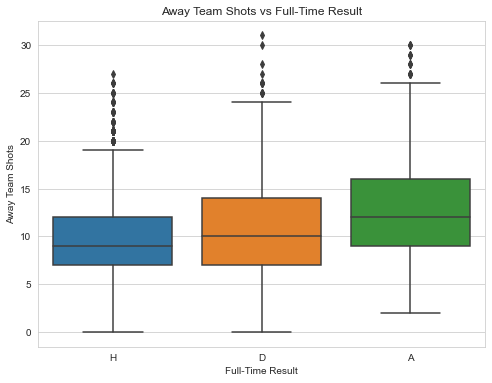

In [139]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Examining relationship between away team shots and full-time result
sns.boxplot(data=data_full, x='FTR', y='AS', order=['H', 'D', 'A'])
ax.set_title('Away Team Shots vs Full-Time Result')
ax.set_xlabel('Full-Time Result')
ax.set_ylabel('Away Team Shots')

plt.show()

In [140]:
# defining the half-time features list
features_half_time = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Convert 'FTR' into a numerical variable for correlation
data_full_numeric = data_full.copy()
data_full_numeric['FTR'] = data_full_numeric['FTR'].map({'H': 1, 'D': 0, 'A': -1})

# Compute the correlation matrix for half-time features and FTR
correlation_matrix = data_full_numeric[features_half_time + ['FTR']].corr()

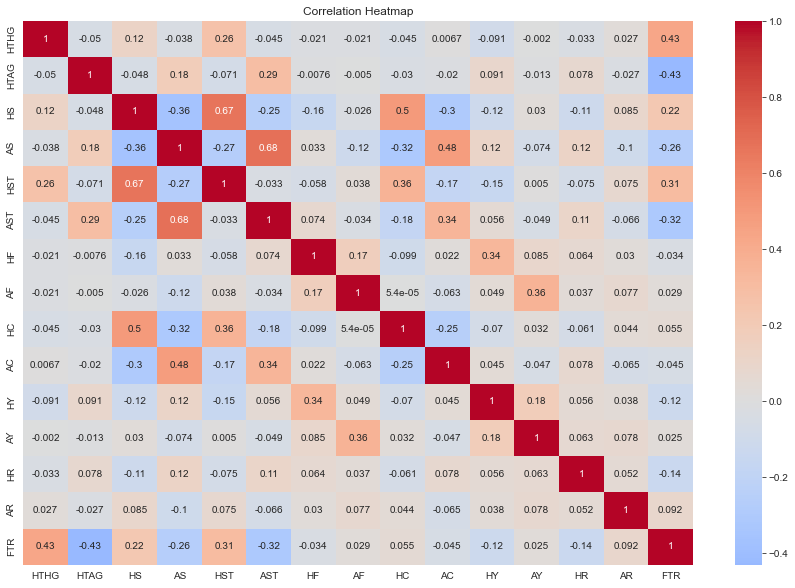

In [141]:
# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [142]:
# Checking for missing values in the dataset
missing_values = data_full.isnull().sum()

In [143]:
# Filtering out columns with missing values (if any)
missing_values = missing_values[missing_values > 0]

missing_values

Series([], dtype: int64)

# outliers

/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


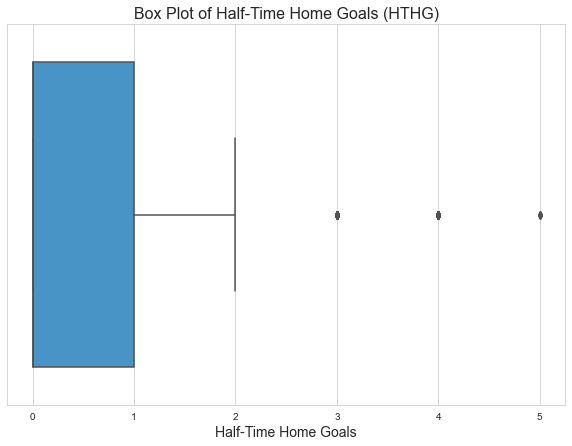

In [144]:
# Box plot for Half-Time Home Goals (HTHG)

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data_full['HTHG'], ax=ax, color='#3498db')
ax.set_title('Box Plot of Half-Time Home Goals (HTHG)', fontsize=16)
ax.set_xlabel('Half-Time Home Goals', fontsize=14)
plt.show()

/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


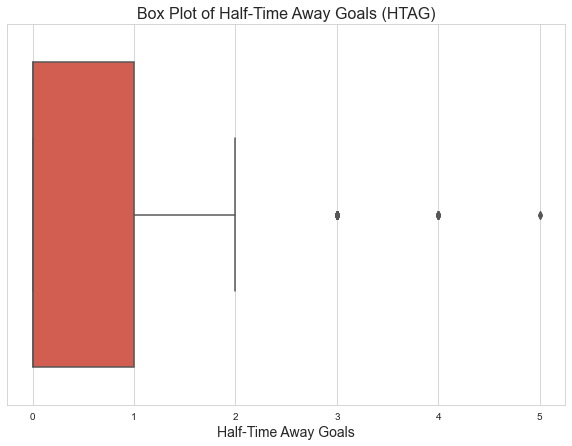

In [145]:
# Box plot for Half-Time Away Goals (HTAG)

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data_full['HTAG'], ax=ax, color='#e74c3c')
ax.set_title('Box Plot of Half-Time Away Goals (HTAG)', fontsize=16)
ax.set_xlabel('Half-Time Away Goals', fontsize=14)
plt.show()


/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


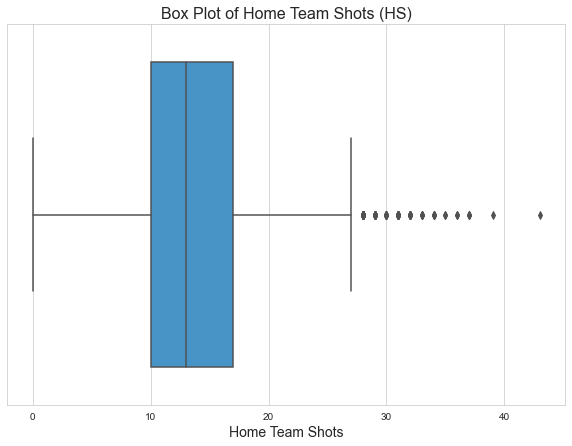

In [146]:
# Box plot for Home Team Shots (HS)

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data_full['HS'], ax=ax, color='#3498db')
ax.set_title('Box Plot of Home Team Shots (HS)', fontsize=16)
ax.set_xlabel('Home Team Shots', fontsize=14)
plt.show()


/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


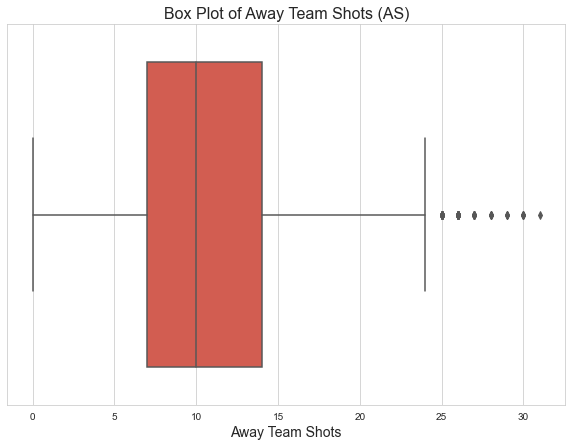

In [147]:
# Box plot for Away Team Shots (AS)

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data_full['AS'], ax=ax, color='#e74c3c')
ax.set_title('Box Plot of Away Team Shots (AS)', fontsize=16)
ax.set_xlabel('Away Team Shots', fontsize=14)
plt.show()


/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


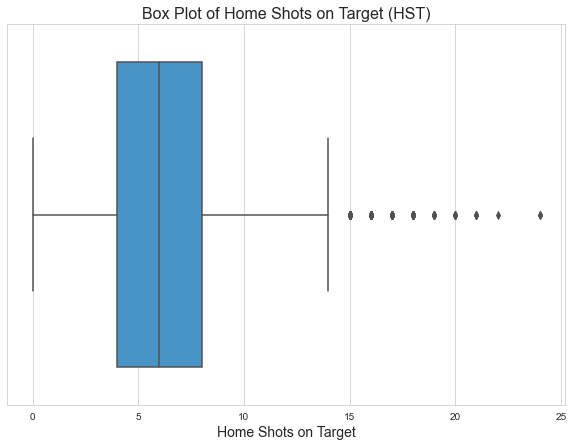

In [148]:
# Box plot for Home Shots on Target (HST)

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data_full['HST'], ax=ax, color='#3498db')
ax.set_title('Box Plot of Home Shots on Target (HST)', fontsize=16)
ax.set_xlabel('Home Shots on Target', fontsize=14)
plt.show()

/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


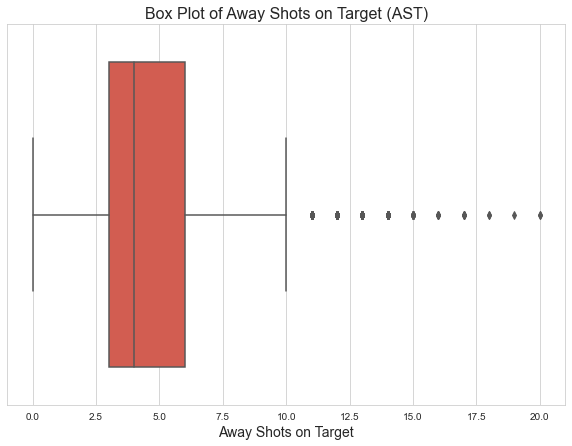

In [149]:
# Box plot for Away Shots on Target (AST)

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data_full['AST'], ax=ax, color='#e74c3c')
ax.set_title('Box Plot of Away Shots on Target (AST)', fontsize=16)
ax.set_xlabel('Away Shots on Target', fontsize=14)
plt.show()

# # Feature Engineering

In [150]:
# 1. Shot Accuracy
data_full['Home_Shot_Accuracy'] = data_full['HST'] / data_full['HS']
data_full['Away_Shot_Accuracy'] = data_full['AST'] / data_full['AS']

# 2. Aggressiveness or Physical Play
data_full['Home_Aggression'] = data_full['HF'] + data_full['HY'] + 2 * data_full['HR']
data_full['Away_Aggression'] = data_full['AF'] + data_full['AY'] + 2 * data_full['AR']

# 3. Dominance Index
data_full['Home_Dominance'] = data_full['HS'] + data_full['HC']
data_full['Away_Dominance'] = data_full['AS'] + data_full['AC']

# 4. Goal Difference at Half-Time
data_full['Half_Time_Goal_Difference'] = data_full['HTHG'] - data_full['HTAG']

# 6. Attack vs. Defense Balance
data_full['Home_Attack_Defense_Balance'] = data_full['HS'] - data_full['AS']
data_full['Away_Attack_Defense_Balance'] = data_full['AS'] - data_full['HS']

# Displaying the first few rows after feature engineering
data_full.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AR,Home_Shot_Accuracy,Away_Shot_Accuracy,Home_Aggression,Away_Aggression,Home_Dominance,Away_Dominance,Half_Time_Goal_Difference,Home_Attack_Defense_Balance,Away_Attack_Defense_Balance
0,E0,05/08/22,Crystal Palace,Arsenal,0,2,A,0,1,A,...,0,0.200000,0.200000,17,13,13,15,-1,0,0
1,E0,06/08/22,Fulham,Liverpool,2,2,D,1,0,H,...,0,0.333333,0.363636,9,9,13,15,1,-2,2
2,E0,06/08/22,Bournemouth,Aston Villa,2,0,H,1,0,H,...,0,0.428571,0.133333,21,19,12,20,1,-8,8
3,E0,06/08/22,Leeds,Wolves,2,1,H,1,1,D,...,0,0.333333,0.400000,15,9,18,19,0,-3,3
4,E0,06/08/22,Newcastle,Nott'm Forest,2,0,H,0,0,D,...,0,0.434783,0.000000,9,17,34,6,0,18,-18


In [151]:
# Summary of the new features
new_features_summary = data_full[['Home_Shot_Accuracy', 'Away_Shot_Accuracy', 'Home_Aggression', 
                                  'Away_Aggression', 'Home_Dominance', 'Away_Dominance', 
                                  'Half_Time_Goal_Difference', 
                                         'Home_Attack_Defense_Balance', 'Away_Attack_Defense_Balance']].describe()

new_features_summary


,Home_Shot_Accuracy,Away_Shot_Accuracy,Home_Aggression,Away_Aggression,Home_Dominance,Away_Dominance,Half_Time_Goal_Difference,Home_Attack_Defense_Balance,Away_Attack_Defense_Balance
count,7599.000000,7596.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,0.442546,0.439098,12.671053,13.479079,19.665658,15.649737,0.172895,2.785526,-2.785526
std,0.182051,0.195378,4.274741,4.542016,7.411889,6.488671,1.137062,8.304559,8.304559
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-5.000000,-25.000000,-40.000000
25%,0.312500,0.300000,10.000000,10.000000,14.000000,11.000000,0.000000,-3.000000,-8.000000
50%,0.437500,0.428571,12.000000,13.000000,19.000000,15.000000,0.000000,3.000000,-3.000000
75%,0.571429,0.571429,15.000000,16.000000,24.000000,20.000000,1.000000,8.000000,3.000000
max,1.000000,1.125000,36.000000,34.000000,56.000000,42.000000,5.000000,40.000000,25.000000


In [152]:
# 1. Encoding categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(data_full[['Div']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Div']))

# Concatenating the encoded features with the original dataframe
data_full_encoded = pd.concat([data_full, encoded_df], axis=1).drop('Div', axis=1)

# 2. Scaling and Normalizing numerical features
# Excluding target variable, date, team names, and already encoded features
features_to_scale = data_full_encoded.select_dtypes(include=[np.number]).columns.difference(['FTR'])

scaler = StandardScaler()
data_full_encoded[features_to_scale] = scaler.fit_transform(data_full_encoded[features_to_scale])

# Displaying the head of the preprocessed dataset
data_full_encoded.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AR,Home_Shot_Accuracy,Away_Shot_Accuracy,Home_Aggression,Away_Aggression,Home_Dominance,Away_Dominance,Half_Time_Goal_Difference,Home_Attack_Defense_Balance,Away_Attack_Defense_Balance
0,05/08/22,Crystal Palace,Arsenal,-1.164526,0.724505,A,-0.818753,0.668647,A,A Taylor,...,-0.290742,-1.332387,-1.223850,1.012747,-0.105484,-0.899379,-0.100141,-1.031582,-0.335443,0.335443
1,06/08/22,Fulham,Liverpool,0.359303,0.724505,D,0.374215,-0.705533,H,A Madley,...,-0.290742,-0.599943,-0.386259,-0.858834,-0.986208,-0.899379,-0.100141,0.727454,-0.576291,0.576291
2,06/08/22,Bournemouth,Aston Villa,0.359303,-1.011110,H,0.374215,-0.705533,H,P Bankes,...,-0.290742,-0.076769,-1.565092,1.948538,1.215602,-1.034306,0.670484,0.727454,-1.298833,1.298833
3,06/08/22,Leeds,Wolves,0.359303,-0.143302,H,0.374215,0.668647,D,R Jones,...,-0.290742,-0.599943,-0.200127,0.544852,-0.986208,-0.224743,0.516359,-0.152064,-0.696715,0.696715
4,06/08/22,Newcastle,Nott'm Forest,0.359303,-1.011110,H,-0.818753,-0.705533,D,S Hooper,...,-0.290742,-0.042649,-2.247574,-0.858834,0.775240,1.934093,-1.487265,-0.152064,1.832183,-1.832183


In [153]:
# Sorting the dataset based on the 'Date' column
data_full_encoded_sorted = data_full_encoded.sort_values(by='Date')

# Defining the split index for a time-based split (for example, using 80% of the data for training)
split_index = int(0.8 * len(data_full_encoded_sorted))

# Splitting the data into training and test sets based on the split index
train_data = data_full_encoded_sorted.iloc[:split_index]
test_data = data_full_encoded_sorted.iloc[split_index:]

# Splitting the data into features (X) and target variable (y)
X_train_time_based = train_data.drop(columns=['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
y_train_time_based = train_data['FTR']

X_test_time_based = test_data.drop(columns=['Date', 'HomeTeam', 'AwayTeam', 'FTR'])
y_test_time_based = test_data['FTR']

# Displaying the shape of the training and test sets after time-based split
X_train_time_based.shape, X_test_time_based.shape, y_train_time_based.shape, y_test_time_based.shape

((6080, 27), (1520, 27), (6080,), (1520,))

In [154]:
# Initialize the label encoder
le = LabelEncoder()

# Fit on the training data and transform both training and test targets
y_train_encoded = le.fit_transform(y_train_time_based)
y_test_encoded = le.transform(y_test_time_based)

In [155]:
non_numeric_columns = X_train_time_based.select_dtypes(exclude=[np.number]).columns

In [156]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoded_features_train = encoder.fit_transform(X_train_time_based[non_numeric_columns])
encoded_df_train = pd.DataFrame(encoded_features_train, columns=encoder.get_feature_names_out(non_numeric_columns))

# Transforming the test set
encoded_features_test = encoder.transform(X_test_time_based[non_numeric_columns])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(non_numeric_columns))

X_train_encoded = pd.concat([X_train_time_based, encoded_df_train], axis=1).drop(non_numeric_columns, axis=1)
X_test_encoded = pd.concat([X_test_time_based, encoded_df_test], axis=1).drop(non_numeric_columns, axis=1)

/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [157]:
X_train_encoded.fillna(X_train_encoded.mean(), inplace=True)
X_test_encoded.fillna(X_test_encoded.mean(), inplace=True)

In [158]:
X_train_encoded = X_train_encoded.loc[y_train_time_based.index]
X_test_encoded = X_test_encoded.loc[y_test_time_based.index]

In [159]:
print(X_train_encoded.shape, y_train_time_based.shape)
print(X_test_encoded.shape, y_test_time_based.shape)

(6080, 102) (6080,)
(1520, 102) (1520,)


In [160]:
# Training a Logistic Regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_encoded, y_train_encoded)
y_pred = lr.predict(X_test_encoded)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")

Accuracy of Logistic Regression: 1.00


In [161]:
# Training a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_encoded, y_train_encoded)  
y_pred_dt = dt.predict(X_test_encoded)
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)  
print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}")

Accuracy of Decision Tree: 1.00


In [162]:
# Training an SVM model
svm = SVC()
svm.fit(X_train_encoded, y_train_encoded)  
y_pred_svm = svm.predict(X_test_encoded)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)  
print(f"Accuracy of SVM: {accuracy_svm:.2f}")

#check

Accuracy of SVM: 1.00


In [163]:
# Training a KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_encoded, y_train_encoded)
y_pred_knn = knn.predict(X_test_encoded)
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print(f"Accuracy of KNN: {accuracy_knn:.2f}")


Accuracy of KNN: 0.72


In [164]:
# Training a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, y_train_encoded)
y_pred_rf = rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}")

Accuracy of Random Forest: 0.95


In [165]:
# Training a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_encoded, y_train_encoded)
y_pred_gb = gb.predict(X_test_encoded)
accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb:.2f}")

Accuracy of Gradient Boosting: 1.00


In [166]:
# Check if any indices are common between training and test set
common_indices = X_train_encoded.index.intersection(X_test_encoded.index)

if len(common_indices) > 0:
    print("Warning: There is overlap between training and test sets!")
else:
    print("No overlap between training and test sets.")

No overlap between training and test sets.


In [124]:
y = np.concatenate([y_train_encoded, y_test_encoded])

# Then, continue with the cross-validation:
scores = cross_val_score(lr, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average CV score: {scores.mean():.2f}")

NameError: name 'X' is not defined

In [167]:
# For Random Forest as an example
feature_importances = rf.feature_importances_
features = X_train_encoded.columns

# Displaying feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))  # Display top 10 important features

                        Feature  Importance
0                          FTHG    0.211948
1                          FTAG    0.197585
22    Half_Time_Goal_Difference    0.073186
2                          HTHG    0.042242
3                          HTAG    0.035459
16           Home_Shot_Accuracy    0.029341
6                           HST    0.027363
17           Away_Shot_Accuracy    0.026012
7                           AST    0.024124
23  Home_Attack_Defense_Balance    0.023734


In [168]:
# Drop 'FTHG' and 'FTAG' columns from training and testing data
X_train_encoded = X_train_encoded.drop(['FTHG', 'FTAG'], axis=1)
X_test_encoded = X_test_encoded.drop(['FTHG', 'FTAG'], axis=1)

In [194]:
# Training
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_encoded, y_train_encoded)  

# Predict
y_pred_lr = lr.predict(X_test_encoded)

# Evaluate
acc_lr = accuracy_score(y_test_encoded, y_pred_lr)  
f1_lr = f1_score(y_test_encoded, y_pred_lr, average='macro')  
precision_lr = precision_score(y_test_encoded, y_pred_lr, average='macro')  

print(f"Logistic Regression Model Summary:")
print("-" * 40)
print(f"Classes: {lr.classes_}")
print(f"Number of Iterations: {lr.n_iter_[0]}")
print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")
print("-" * 40)
print(f"Accuracy: {acc_lr:.2f}")
print(f"F1-Score (macro): {f1_lr:.2f}")
print(f"Precision (macro): {precision_lr:.2f}")
print("-" * 40)

Logistic Regression Model Summary:
----------------------------------------
Classes: [0 1 2]
Number of Iterations: 195
Intercept: [-0.41664262  0.0868306   0.32981201]
Coefficients: [[-4.24003388e-01  4.14658397e-01 -4.68049902e-02  1.26879780e-01
  -2.14384785e-01  1.22152536e-01 -1.46543189e-02 -8.92174694e-03
   9.37728069e-02 -1.28545814e-01  2.63312720e-02 -4.13502222e-02
   1.64379137e-01 -1.68551190e-01 -1.87229866e-01  2.85459165e-01
   1.38654799e-02 -4.05390992e-02  5.46897150e-03  3.74798007e-02
  -5.77991198e-01 -1.02007770e-01  1.02007770e-01 -8.38879289e-02
  -5.76224868e-03  2.28303933e-01 -1.65592867e-02  2.48631833e-04
  -6.95661964e-02  1.27391773e-02  6.25746166e-02 -2.13066146e-01
   2.89708998e-01  1.03705613e-01 -1.16550288e-01  2.32969840e-01
   1.75828486e-01  1.44535248e-01  9.56435949e-04 -6.89287005e-02
   2.05193120e-01 -1.14610602e-01  3.74215726e-02  2.46125852e-01
  -1.08978611e-01  3.87100581e-01  2.90115365e-01 -8.93407581e-02
  -5.11348798e-03 -6.57544

In [170]:
# Training
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded, y_train_encoded)

# Predict
y_pred_dt = dt.predict(X_test_encoded)

# Evaluate
acc_dt = accuracy_score(y_test_encoded, y_pred_dt)
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='macro')
precision_dt = precision_score(y_test_encoded, y_pred_dt, average='macro')

print(f"Decision Tree:")
print(f"Accuracy: {acc_dt:.2f}")
print(f"F1-Score (macro): {f1_dt:.2f}")
print(f"Precision (macro): {precision_dt:.2f}")
print("-" * 40)


Decision Tree:
Accuracy: 0.56
F1-Score (macro): 0.53
Precision (macro): 0.53
----------------------------------------


In [171]:
# Training
svc = SVC(probability=True)
svc.fit(X_train_encoded, y_train_encoded)  

# Predict
y_pred_svc = svc.predict(X_test_encoded)

# Evaluate
acc_svc = accuracy_score(y_test_encoded, y_pred_svc)  
f1_svc = f1_score(y_test_encoded, y_pred_svc, average='macro')  
precision_svc = precision_score(y_test_encoded, y_pred_svc, average='macro')  

print(f"SVM:")
print(f"Accuracy: {acc_svc:.2f}")
print(f"F1-Score (macro): {f1_svc:.2f}")
print(f"Precision (macro): {precision_svc:.2f}")
print("-" * 40)


SVM:
Accuracy: 0.64
F1-Score (macro): 0.58
Precision (macro): 0.60
----------------------------------------


In [172]:
# Training
knn = KNeighborsClassifier()
knn.fit(X_train_encoded, y_train_encoded)  

# Predict
y_pred_knn = knn.predict(X_test_encoded)

# Evaluate
acc_knn = accuracy_score(y_test_encoded, y_pred_knn)  
f1_knn = f1_score(y_test_encoded, y_pred_knn, average='macro')  
precision_knn = precision_score(y_test_encoded, y_pred_knn, average='macro')  

print(f"KNN:")
print(f"Accuracy: {acc_knn:.2f}")
print(f"F1-Score (macro): {f1_knn:.2f}")
print(f"Precision (macro): {precision_knn:.2f}")
print("-" * 40)

KNN:
Accuracy: 0.56
F1-Score (macro): 0.53
Precision (macro): 0.52
----------------------------------------


In [173]:
# Training
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train_encoded)  

# Predict
y_pred_rf = rf.predict(X_test_encoded)

# Evaluate
acc_rf = accuracy_score(y_test_encoded, y_pred_rf)  
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='macro')  
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='macro')  

print(f"Random Forest:")
print(f"Accuracy: {acc_rf:.2f}")
print(f"F1-Score (macro): {f1_rf:.2f}")
print(f"Precision (macro): {precision_rf:.2f}")
print("-" * 40)

Random Forest:
Accuracy: 0.62
F1-Score (macro): 0.57
Precision (macro): 0.57
----------------------------------------


In [174]:
# Training
gb = GradientBoostingClassifier()
gb.fit(X_train_encoded, y_train_encoded)  
# Predict
y_pred_gb = gb.predict(X_test_encoded)

# Evaluate
acc_gb = accuracy_score(y_test_encoded, y_pred_gb)  
f1_gb = f1_score(y_test_encoded, y_pred_gb, average='macro')  
precision_gb = precision_score(y_test_encoded, y_pred_gb, average='macro')  

print(f"Gradient Boosting:")
print(f"Accuracy: {acc_gb:.2f}")
print(f"F1-Score (macro): {f1_gb:.2f}")
print(f"Precision (macro): {precision_gb:.2f}")
print("-" * 40)

Gradient Boosting:
Accuracy: 0.66
F1-Score (macro): 0.61
Precision (macro): 0.62
----------------------------------------


In [175]:
from sklearn.metrics import classification_report

# Generate classification reports for each model
report_lr = classification_report(y_test_encoded, y_pred_lr, output_dict=True)  
report_dt = classification_report(y_test_encoded, y_pred_dt, output_dict=True)  
report_svm = classification_report(y_test_encoded, y_pred_svm, output_dict=True)  
report_knn = classification_report(y_test_encoded, y_pred_knn, output_dict=True)  
report_rf = classification_report(y_test_encoded, y_pred_rf, output_dict=True)  
report_gb = classification_report(y_test_encoded, y_pred_gb, output_dict=True)  


# Convert each report to a DataFrame
df_lr = pd.DataFrame(report_lr).transpose()
df_dt = pd.DataFrame(report_dt).transpose()
df_svm = pd.DataFrame(report_svm).transpose()
df_knn = pd.DataFrame(report_knn).transpose()
df_rf = pd.DataFrame(report_rf).transpose()
df_gb = pd.DataFrame(report_gb).transpose()

# Consolidate all reports into one DataFrame
consolidated_report = pd.concat([df_lr, df_dt, df_svm, df_knn, df_rf, df_gb], 
                                keys=['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Gradient Boosting'],
                                axis=1)
consolidated_report

Logistic Regression                                   \
                       precision    recall  f1-score      support   
0                       0.651639  0.701987  0.675877   453.000000   
1                       0.450777  0.220812  0.296422   394.000000   
2                       0.678188  0.845468  0.752646   673.000000   
accuracy                0.640789  0.640789  0.640789     0.640789   
macro avg               0.593535  0.589422  0.574982  1520.000000   
weighted avg            0.611329  0.640789  0.611509  1520.000000   

             Decision Tree                                        SVM  \
                 precision    recall  f1-score      support precision   
0                 0.589623  0.551876  0.570125   453.000000  0.997778   
1                 0.349333  0.332487  0.340702   394.000000  0.989899   
2                 0.643551  0.689450  0.665710   673.000000  0.998516   
accuracy          0.555921  0.555921  0.555921     0.555921  0.996053   
macro avg         0.527502  0.524605  0.525513  1520.000000  0.995398   
weighted avg      0.551214  0.555921  0.552978  1520.000000  0.996063   

                        ...       KNN              Random Forest            \
                recall  ...  f1-score      support     precision    recall   
0             0.991170  ...  0.614458   453.000000      0.641631  0.660044   
1             0.994924  ...  0.286115   394.000000      0.383764  0.263959   
2             1.000000  ...  0.676183   673.000000      0.683269  0.794948   
accuracy      0.996053  ...  0.564474     0.564474      0.617105  0.617105   
macro avg     0.995365  ...  0.525585  1520.000000      0.569555  0.572984   
weighted avg  0.996053  ...  0.556678  1520.000000      0.593225  0.617105   

                                    Gradient Boosting                      \
              f1-score      support         precision    recall  f1-score   
0             0.650707   453.000000          0.691111  0.686534  0.688815   
1             0.312782   394.000000          0.472325  0.324873  0.384962   
2             0.734890   673.000000          0.699625  0.830609  0.759511   
accuracy      0.617105     0.617105          0.656579  0.656579  0.656579   
macro avg     0.566126  1520.000000          0.621020  0.614006  0.611096   
weighted avg  0.600387  1520.000000          0.638169  0.656579  0.641355   

                           
                  support  
0              453.000000  
1              394.000000  
2              673.000000  
accuracy         0.656579  
macro avg     1520.000000  
weighted avg  1520.000000  

[6 rows x 24 columns]

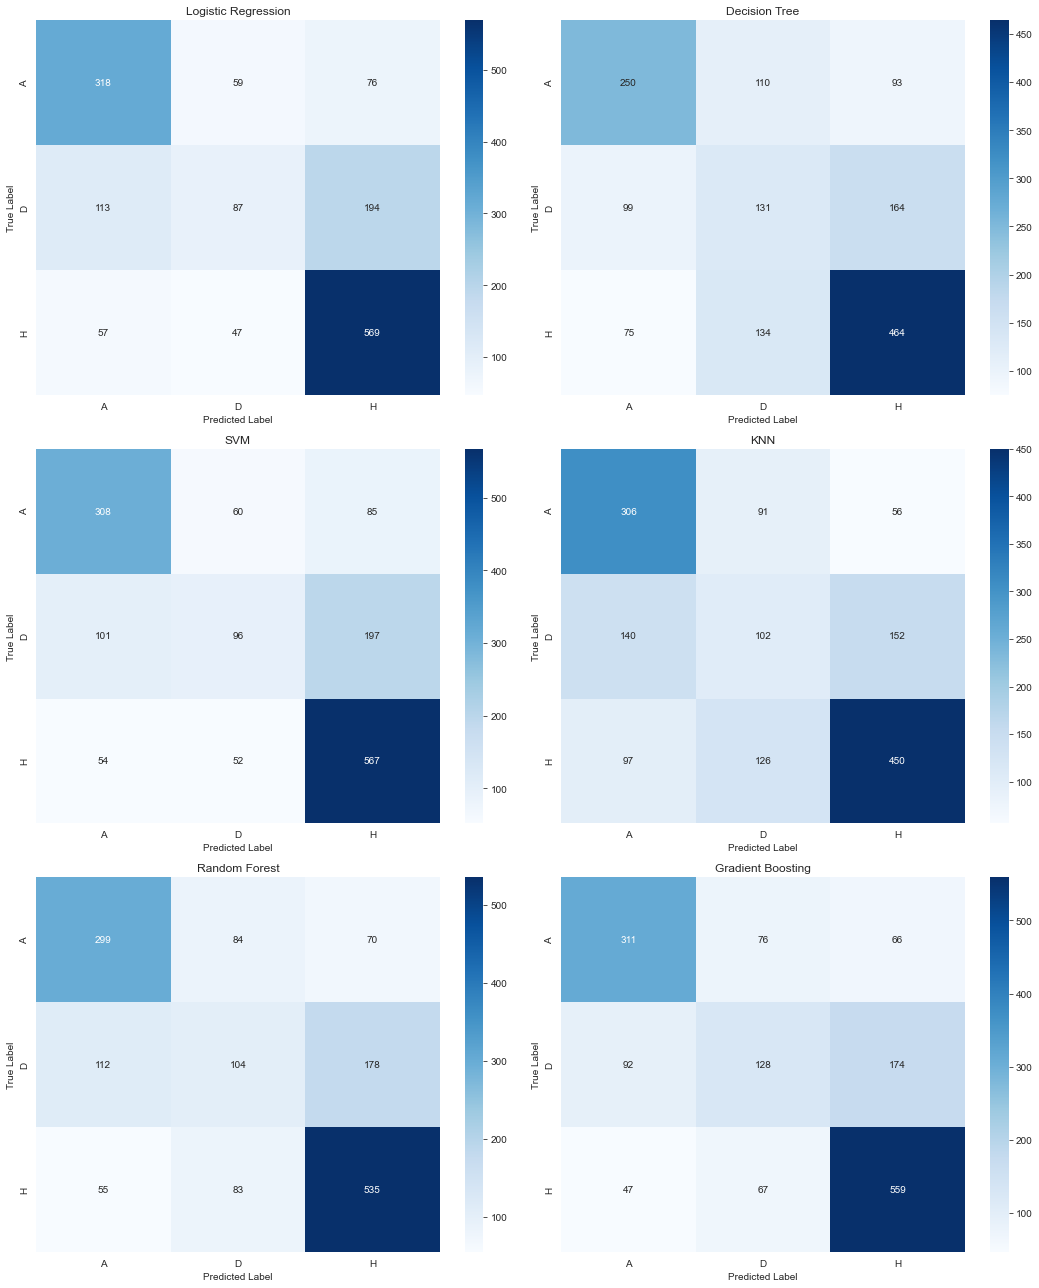

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title):
    # Compute confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    # Use a seaborn heatmap for visualization
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['A', 'D', 'H'], yticklabels=['A', 'D', 'H'], ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)

# Create subplots for displaying the confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

models = [
    ('Logistic Regression', y_pred_lr),
    ('Decision Tree', y_pred_dt),
    ('SVM', y_pred_svc),
    ('KNN', y_pred_knn),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]

for ax, (title, y_pred) in zip(axes.ravel(), models):
    plot_confusion_matrix(ax, y_test_encoded, y_pred, title)

plt.tight_layout()
plt.show()

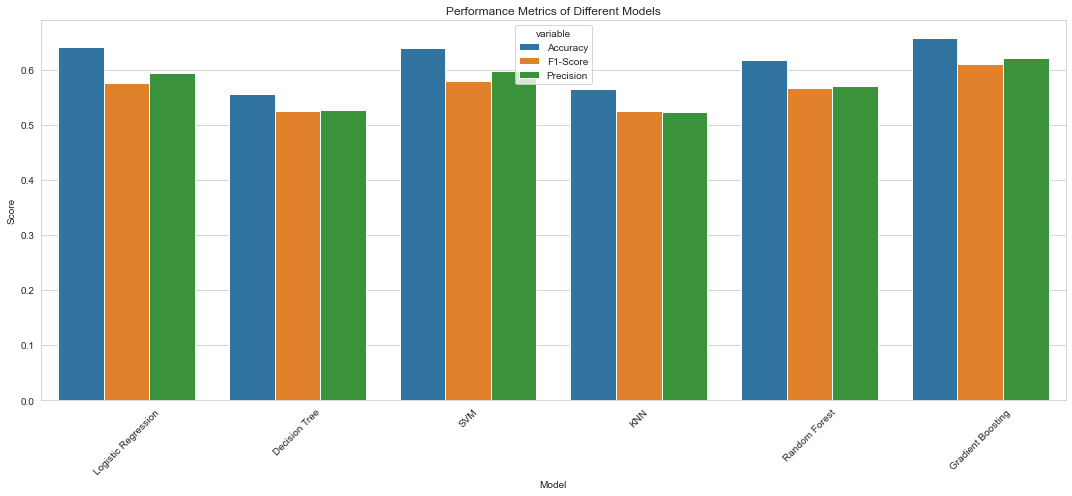

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 'Gradient Boosting']
accuracies = [acc_lr, acc_dt, acc_svc, acc_knn, acc_rf, acc_gb]
f1_scores = [f1_lr, f1_dt, f1_svc, f1_knn, f1_rf, f1_gb]
precisions = [precision_lr, precision_dt, precision_svc, precision_knn, precision_rf, precision_gb]

df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1-Score': f1_scores,
    'Precision': precisions
})

# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df.melt(id_vars='Model', value_vars=['Accuracy', 'F1-Score', 'Precision'])

# Create the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(data=df_melted, x='Model', y='value', hue='variable')
plt.title('Performance Metrics of Different Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

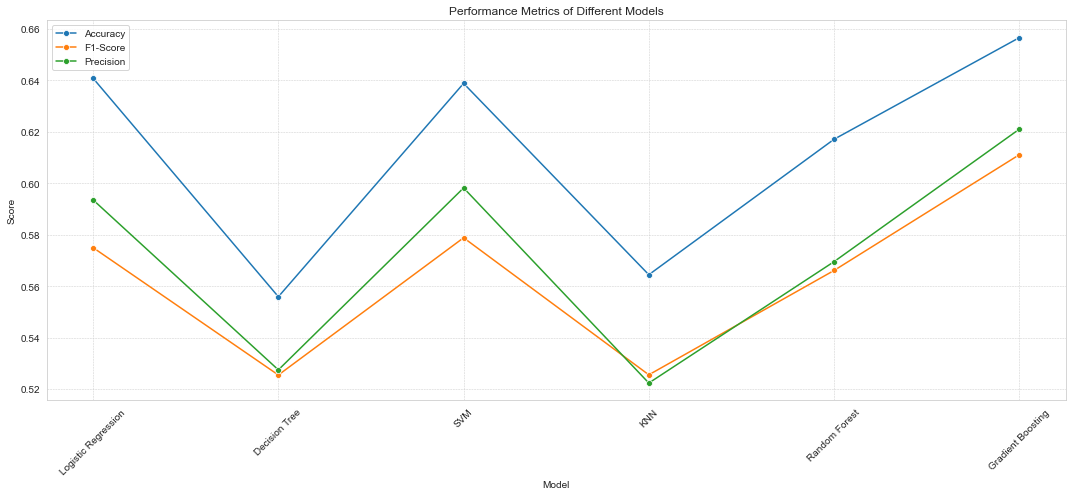

In [178]:
plt.figure(figsize=(15, 7))
for metric in ['Accuracy', 'F1-Score', 'Precision']:
    sns.lineplot(data=df, x='Model', y=metric, label=metric, marker='o')
plt.title('Performance Metrics of Different Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


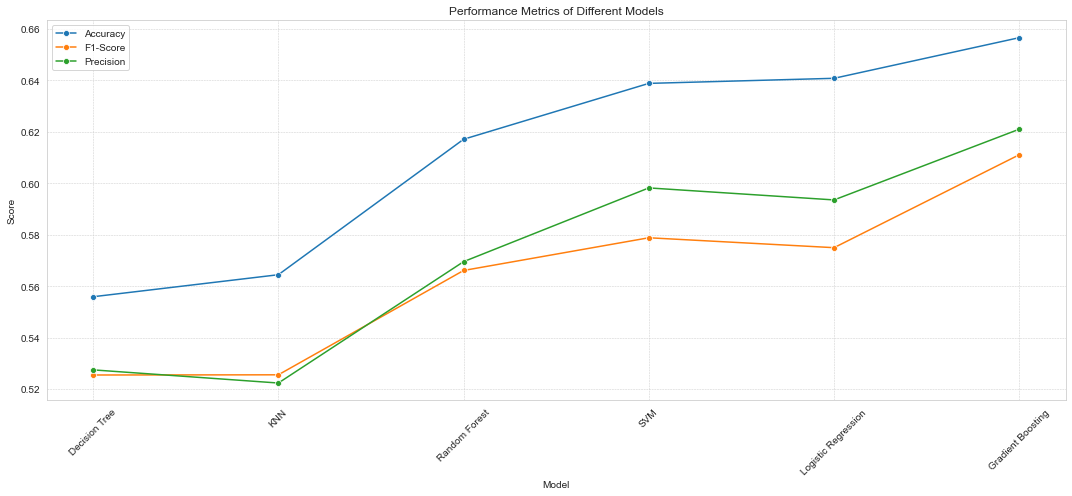

In [195]:
# Sort the DataFrame based on 'Accuracy'
df = df.sort_values(by='Accuracy')

plt.figure(figsize=(15, 7))
for metric in ['Accuracy', 'F1-Score', 'Precision']:
    sns.lineplot(data=df, x='Model', y=metric, label=metric, marker='o')
plt.title('Performance Metrics of Different Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


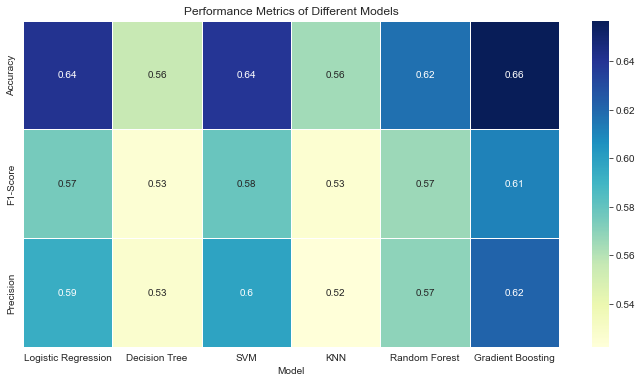

In [179]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.set_index('Model').T, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Performance Metrics of Different Models')
plt.show()


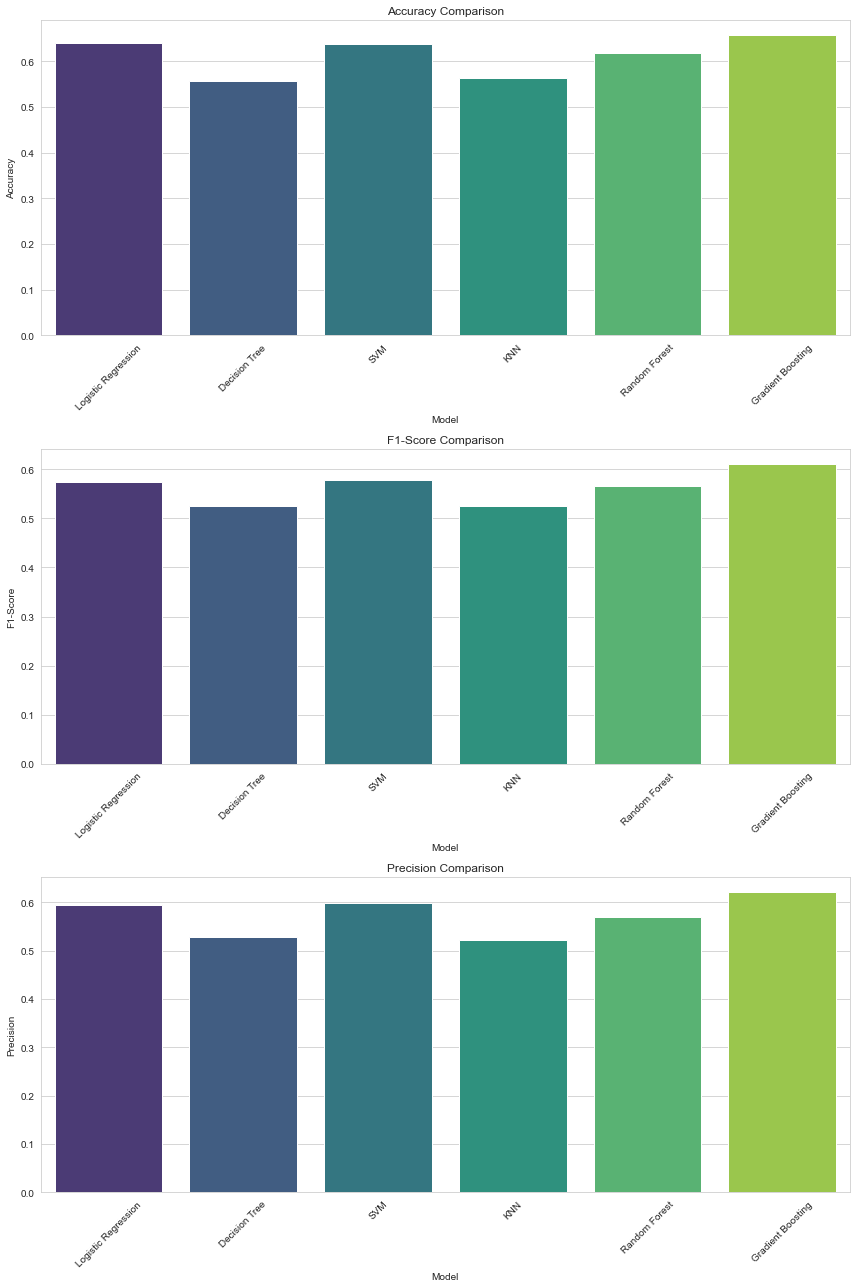

In [180]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(data=df, x='Model', y='Accuracy', ax=axes[0], palette='viridis')
axes[0].set_title('Accuracy Comparison')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=df, x='Model', y='F1-Score', ax=axes[1], palette='viridis')
axes[1].set_title('F1-Score Comparison')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=df, x='Model', y='Precision', ax=axes[2], palette='viridis')
axes[2].set_title('Precision Comparison')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Bagging

In [181]:
# Bagging with Decision Trees
bagging_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_tree.fit(X_train_encoded, y_train_encoded)  

# Predictions
y_pred_bagging = bagging_tree.predict(X_test_encoded)

# Evaluation
accuracy_bagging = accuracy_score(y_test_encoded, y_pred_bagging)  
f1_bagging = f1_score(y_test_encoded, y_pred_bagging, average='macro')  
precision_bagging = precision_score(y_test_encoded, y_pred_bagging, average='macro')  

print(f"Accuracy of Bagging (Decision Trees): {accuracy_bagging:.2f}")
print(f"F1-Score of Bagging (Decision Trees): {f1_bagging:.2f}")
print(f"Precision of Bagging (Decision Trees): {precision_bagging:.2f}")

Accuracy of Bagging (Decision Trees): 0.62
F1-Score of Bagging (Decision Trees): 0.59
Precision of Bagging (Decision Trees): 0.59


# XGBoost

In [182]:
# Mapping the target variable values to integers
mapping = {'A': 0, 'D': 1, 'H': 2}
y_train_mapped = y_train_time_based.map(mapping)  
y_test_mapped = y_test_time_based.map(mapping)    

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", num_class=3, eval_metric="mlogloss", use_label_encoder=False)

# Train the classifier with mapped values
xgb_classifier.fit(X_train_encoded, y_train_mapped)

# Predict on the test set
y_pred_xgb_mapped = xgb_classifier.predict(X_test_encoded)

# Map the predictions back to their original string representations
reverse_mapping = {v: k for k, v in mapping.items()}
y_pred_xgb = np.array([reverse_mapping[val] for val in y_pred_xgb_mapped])

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_time_based, y_pred_xgb)  
f1_xgb = f1_score(y_test_time_based, y_pred_xgb, average="macro")  
precision_xgb = precision_score(y_test_time_based, y_pred_xgb, average="macro")  

print(f"XGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"F1-Score (macro): {f1_xgb:.2f}")
print(f"Precision (macro): {precision_xgb:.2f}")


/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Classifier:
Accuracy: 0.62
F1-Score (macro): 0.59
Precision (macro): 0.59


In [183]:
# Logistic Regression
lr_probs = lr.predict_proba(X_test_encoded)

# Decision Tree
dt_probs = dt.predict_proba(X_test_encoded)

# SVM (Support Vector Machines need a slight modification for multi-class probability estimation)
svm_probs = svc.decision_function(X_test_encoded)
svm_probs = (svm_probs - svm_probs.min()) / (svm_probs.max() - svm_probs.min())

# KNN (K-Nearest Neighbors)
knn_probs = knn.predict_proba(X_test_encoded)

# Random Forest
rf_probs = rf.predict_proba(X_test_encoded)

# Gradient Boosting
gb_probs = gb.predict_proba(X_test_encoded)

# XGBoost
xgb_probs = xgb_classifier.predict_proba(X_test_encoded)

In [184]:
# Combine the Probabilities
combined_probs = (lr_probs + dt_probs + svm_probs + knn_probs + rf_probs + gb_probs + xgb_probs) / 7

In [185]:
combined_probs

array([[0.01009795, 0.16273447, 0.90779558],
       [0.8835743 , 0.14653349, 0.03335805],
       [0.04113122, 0.34009605, 0.68870085],
       ...,
       [0.05539959, 0.22020656, 0.79953331],
       [0.47772315, 0.42055924, 0.17808729],
       [0.12288405, 0.40956987, 0.54564973]])

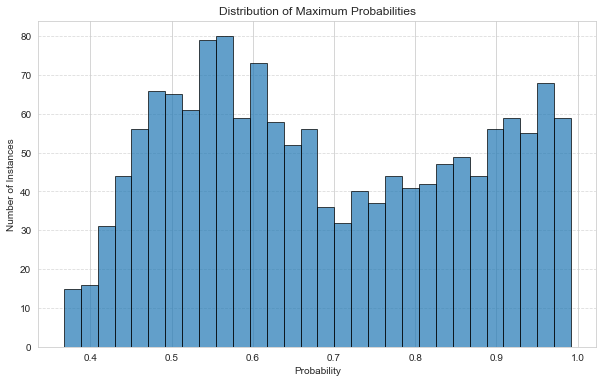

In [186]:
import matplotlib.pyplot as plt

# Extracting the maximum probability for each instance
max_probs = np.max(combined_probs, axis=1)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(max_probs, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Maximum Probabilities')
plt.xlabel('Probability')
plt.ylabel('Number of Instances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [187]:
# Get Final Ensemble Predictions
ensemble_predictions = np.argmax(combined_probs, axis=1)

# Averaging ensemble

In [188]:
# Convert the numerical predictions back to class labels ('A', 'D', 'H')
mapping = {0: 'A', 1: 'D', 2: 'H'}
ensemble_predictions_labels = [mapping[pred] for pred in ensemble_predictions]

# Evaluate the ensemble
accuracy_ensemble = accuracy_score(y_test_time_based, ensemble_predictions_labels)  
f1_ensemble = f1_score(y_test_time_based, ensemble_predictions_labels, average="macro")  
precision_ensemble = precision_score(y_test_time_based, ensemble_predictions_labels, average="macro")  

print(f"Ensemble Classifier:")
print(f"Accuracy: {accuracy_ensemble:.2f}")
print(f"F1-Score (macro): {f1_ensemble:.2f}")
print(f"Precision (macro): {precision_ensemble:.2f}")

Ensemble Classifier:
Accuracy: 0.64
F1-Score (macro): 0.59
Precision (macro): 0.60


In [189]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Confidence-based Dynamic Ensemble

In [190]:
# 1. Collecting all the classifiers in a dictionary:
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'SVM': svc,
    'KNN': knn,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

# 2. Confidence-based Dynamic Ensemble Selection Function:
def confidence_based_prediction(X, classifiers):
    # Get the probability predictions for each classifier
    probas = {clf_name: clf.predict_proba(X) for clf_name, clf in classifiers.items()}
    
    # For each instance, get the classifier that's most confident
    predictions = []
    for i in range(X.shape[0]):
        confidences = {clf_name: max(proba[i]) for clf_name, proba in probas.items()}
        most_confident_clf = max(confidences, key=confidences.get)
        prediction = classifiers[most_confident_clf].predict(X[i].reshape(1, -1))
        predictions.append(prediction[0])
    
    return predictions

# 3. Getting predictions using the confidence-based ensemble:
y_pred_confidence_based = confidence_based_prediction(X_test_encoded.values, classifiers)

# Mapping the numerical predictions back to class labels ('A', 'D', 'H')
y_pred_confidence_based_labels = [mapping[pred] for pred in y_pred_confidence_based]

# Evaluating the confidence-based ensemble:
accuracy_confidence = accuracy_score(y_test_time_based, y_pred_confidence_based_labels)
f1_confidence = f1_score(y_test_time_based, y_pred_confidence_based_labels, average="macro")
precision_confidence = precision_score(y_test_time_based, y_pred_confidence_based_labels, average="macro")

print(f"Confidence-based Ensemble Classifier:")
print(f"Accuracy: {accuracy_confidence:.2f}")
print(f"F1-Score (macro): {f1_confidence:.2f}")
print(f"Precision (macro): {precision_confidence:.2f}")

/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confidence-based Ensemble Classifier:
Accuracy: 0.56
F1-Score (macro): 0.53
Precision (macro): 0.53


/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/nagulbijju/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with featur

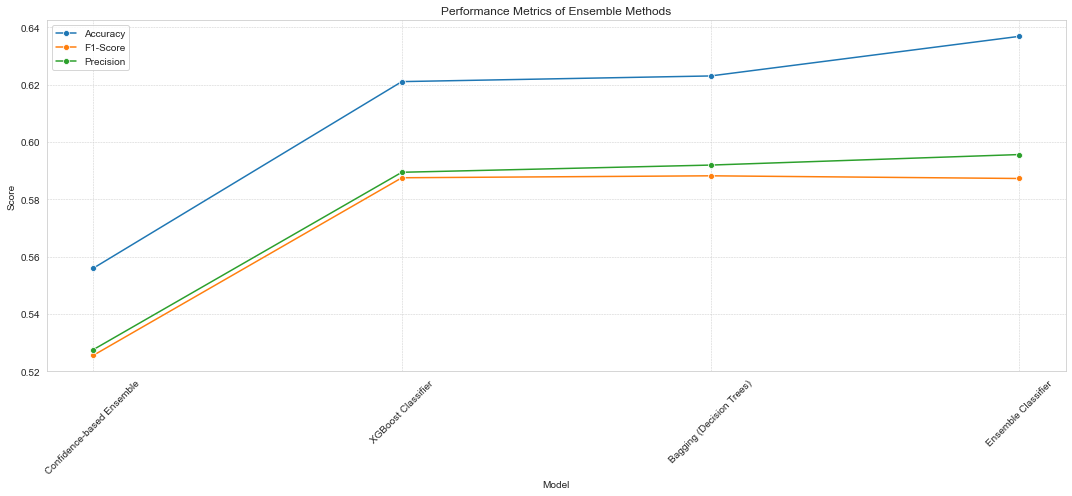

In [197]:
# Ensemble results DataFrame
ensemble_results = pd.DataFrame({
    'Model': ['Bagging (Decision Trees)', 'XGBoost Classifier', 'Ensemble Classifier', 'Confidence-based Ensemble'],
    'Accuracy': [accuracy_bagging, accuracy_xgb, accuracy_ensemble, accuracy_confidence],
    'F1-Score': [f1_bagging, f1_xgb, f1_ensemble, f1_confidence],
    'Precision': [precision_bagging, precision_xgb, precision_ensemble, precision_confidence]
})

# Sort the DataFrame based on 'Accuracy'
ensemble_results = ensemble_results.sort_values(by='Accuracy')

# Visualization
plt.figure(figsize=(15, 7))
for metric in ['Accuracy', 'F1-Score', 'Precision']:
    sns.lineplot(data=ensemble_results, x='Model', y=metric, label=metric, marker='o')
plt.title('Performance Metrics of Ensemble Methods')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

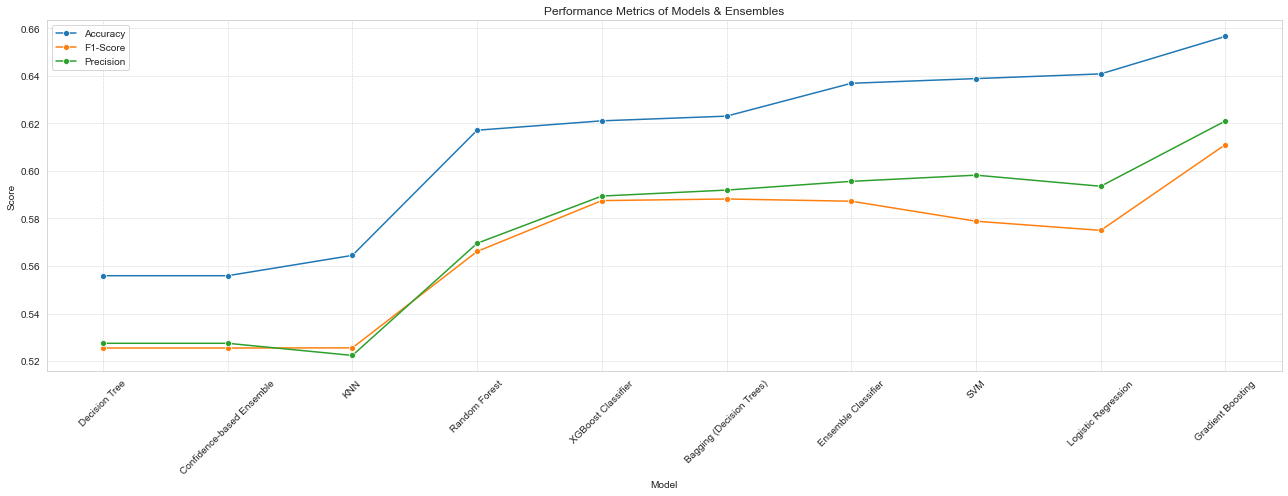

In [196]:
# Consolidating individual model results
model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression', 
        'Decision Tree', 
        'SVM', 
        'KNN', 
        'Random Forest', 
        'Gradient Boosting', 
        'Bagging (Decision Trees)', 
        'XGBoost Classifier', 
        'Ensemble Classifier', 
        'Confidence-based Ensemble'
    ],
    'Accuracy': [
        acc_lr, acc_dt, acc_svc, acc_knn, acc_rf, acc_gb, 
        accuracy_bagging, accuracy_xgb, accuracy_ensemble, accuracy_confidence
    ],
    'F1-Score': [
        f1_lr, f1_dt, f1_svc, f1_knn, f1_rf, f1_gb, 
        f1_bagging, f1_xgb, f1_ensemble, f1_confidence
    ],
    'Precision': [
        precision_lr, precision_dt, precision_svc, precision_knn, precision_rf, precision_gb, 
        precision_bagging, precision_xgb, precision_ensemble, precision_confidence
    ]
})

# Sort the DataFrame based on 'Accuracy'
model_results = model_results.sort_values(by='Accuracy')

# Visualization
plt.figure(figsize=(18, 7))
for metric in ['Accuracy', 'F1-Score', 'Precision']:
    sns.lineplot(data=model_results, x='Model', y=metric, label=metric, marker='o')
plt.title('Performance Metrics of Models & Ensembles')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()